In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('./Crime_Data.csv')

In [3]:
df.head(2)
df.shape # (523591, 11)
# df.info()

(523591, 11)

In [4]:
df['Occurred Date'] = df['Occurred Date'].fillna('None')

In [228]:
df.columns

Index(['Report Number', 'Occurred Date', 'Occurred Time', 'Reported Date',
       'Reported Time', 'Crime Subcategory', 'Primary Offense Description',
       'Precinct', 'Sector', 'Beat', 'Neighborhood'],
      dtype='object')

In [247]:
unique_neighborhoods = df['Neighborhood'].to_frame().groupby('Neighborhood').size().to_frame().index.values

In [257]:
len(unique_neighborhoods)
df[df['Neighborhood'] == unique_neighborhoods[0]]
df[df['Neighborhood'] == unique_neighborhoods[0]]

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
21,2013000033940,01/01/1989,0.0,01/30/2013,1425.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W2,ALASKA JUNCTION
164,20150000322300,11/01/2001,1200.0,09/14/2015,841.0,THEFT-BUILDING,THEFT-BUILDING,SOUTHWEST,W,W2,ALASKA JUNCTION
199,2019000097219,01/01/2003,0.0,03/18/2019,1915.0,RAPE,RAPE-STRONGARM,SOUTHWEST,W,W2,ALASKA JUNCTION
214,20140000275896,10/24/2003,0.0,08/22/2014,1032.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,SOUTHWEST,W,W2,ALASKA JUNCTION
263,20120000151694,01/01/2005,1100.0,05/17/2012,801.0,FAMILY OFFENSE-NONVIOLENT,CHILD-ABUSED-NOFORCE,SOUTHWEST,W,W2,ALASKA JUNCTION
...,...,...,...,...,...,...,...,...,...,...,...
523275,20190000157579,05/03/2019,715.0,05/03/2019,1018.0,THEFT-SHOPLIFT,THEFT-SHOPLIFT,SOUTHWEST,W,W2,ALASKA JUNCTION
523335,20190000159451,05/04/2019,1539.0,05/04/2019,1539.0,BURGLARY-RESIDENTIAL,BURGLARY-NOFORCE-RES,SOUTHWEST,W,W2,ALASKA JUNCTION
523396,20190000158687,05/04/2019,56.0,05/04/2019,56.0,DUI,DUI-LIQUOR,SOUTHWEST,W,W2,ALASKA JUNCTION
523534,20190000161997,05/06/2019,1344.0,05/06/2019,1344.0,BURGLARY-RESIDENTIAL,BURGLARY-NOFORCE-RES,SOUTHWEST,W,W2,ALASKA JUNCTION


In [260]:
neighborhoodChange(df[df['Neighborhood'] == unique_neighborhoods[0]])

KeyError: 0

In [259]:
def neighborhoodChange(df):
    years = []
    months = []
    days = []
    for i in range(len(df)):
        value = str(df['Occurred Date'][i])
        if (value != 'None'):
            year = value[6:10]
            month = value[0:2]
            day = value[3:5]
            months.append(month)
            days.append(day)
            years.append(year) 
            dfDays = pd.DataFrame([years, months, days],index = ['Year', 'Month', 'Day']).T
            dfYear = plotting(dfDays, 'Year', 'Years', 'Reported crime count', 'Reported crime count per year', 20, 5, True)
            dfMonth = plotting(dfDays, 'Month', 'Months', 'Reported crime count', 'Reported crime count per month', 5, 5, False)
            dfDay = plotting(dfDays, 'Day', 'Days', 'Reported crime count', 'Reported crime count per day', 20, 5, False)

In [15]:
years = []
months = []
days = []
for i in range(len(df)):
    value = str(df['Occurred Date'][i])
    if (value != 'None'):
        year = value[6:10]
        month = value[0:2]
        day = value[3:5]
        months.append(month)
        days.append(day)
        years.append(year)
        

In [59]:
dfDays = pd.DataFrame([years, months, days],index = ['Year', 'Month', 'Day'])


In [258]:
# Writes the summary dataFrame to an excel file
file_path=r'datasplitup.xlsx'
sum_stats=pd.ExcelWriter(file_path)
dfDays.to_excel(sum_stats)
sum_stats.save()
sum_stats.close()

In [60]:
dfDays = dfDays.T

In [218]:
def plotting(df1, val, xlabel, ylabel, titlelabel, width, height, rotations):
    dfTest = df1.groupby(val).size()
    dfTest = pd.DataFrame([dfTest], index = [val])
    # TODO: Add in how to make plot bar plot through matplot.
    x = dfTest.T.index.values
    y = dfTest.T[val].values
    
    plt.bar(x, y, color = "g", ) 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(titlelabel)
    if (rotations):
        plt.xticks(rotation=90)
    plt.rcParams['figure.figsize'] = (width,height)
    
    # function to show plot 
    plt.show() 
    # hist1 = dfTest.T[val].plot.bar()
    # plot_regression_line(x, y, b, 'Years', 'Reported Crime Count', 'Reported Crimes per years in Seattle')
    return dfTest

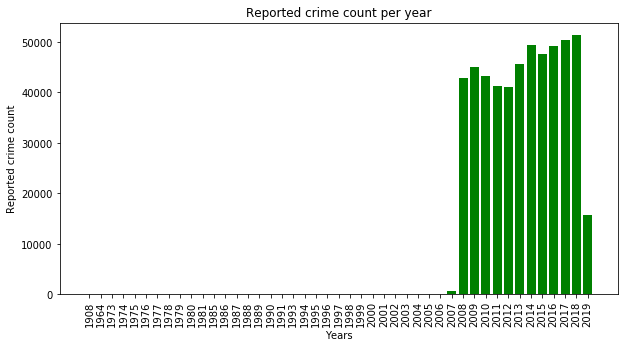

In [217]:
dfYear = plotting(dfDays, 'Year', 'Years', 'Reported crime count', 'Reported crime count per year', 20, 5, True)

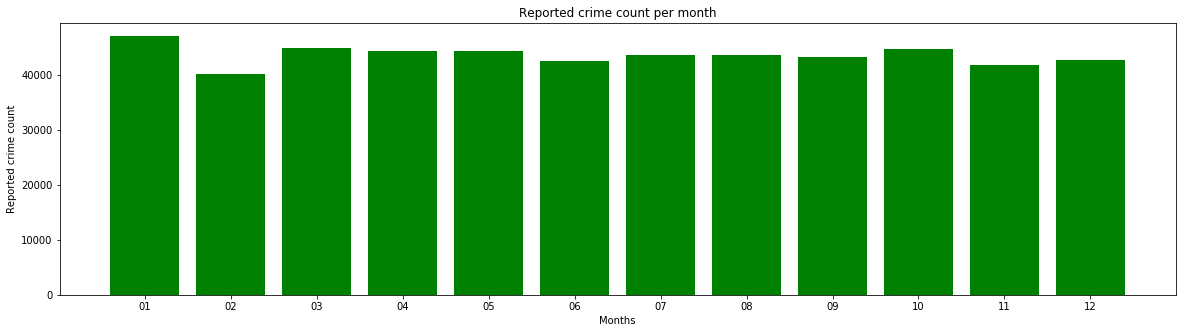

In [215]:
dfMonth = plotting(dfDays, 'Month', 'Months', 'Reported crime count', 'Reported crime count per month', 5, 5, False)

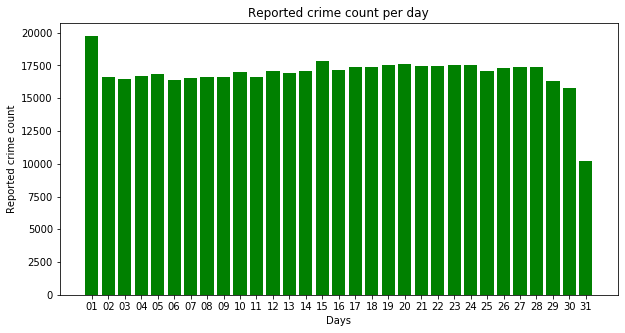

In [214]:
dfDay = plotting(dfDays, 'Day', 'Days', 'Reported crime count', 'Reported crime count per day', 20, 5, False)

In [114]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
    # mean of x and y vector 
    m_x = np.mean(x)
    m_y = np.mean(y) 
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1)

In [125]:
def plot_regression_line(x, y, b, xlabel, ylabel, titlelabel): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(titlelabel)

    # function to show plot 
    plt.show() 

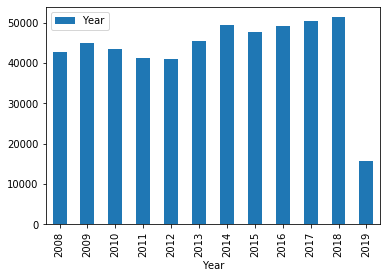

In [139]:
upperYearCount = dfYear.T[dfYear.T['Year'] > 2008]
upperYearCount.plot.bar()

In [128]:
topYears = []
topYearsCrime = []
for i in range(len(upperYearCount) - 1):
    topYears.append(int(upperYearCount['Year'].index[i]) - 2008) 
    topYearsCrime.append(upperYearCount['Year'][i])
x = np.array(topYears)
y = np.array(topYearsCrime)

Estimated coefficients:
b_0 = 41431.590909090904  \ 
b_1 = 930.5727272727273
Equation for expected amount of crime this year is: Crime = Years * 931.0 + 41432.0
The expected amount of crimes in the Seattle area is 51668.0 in 2019 and 52598.0 in 2020


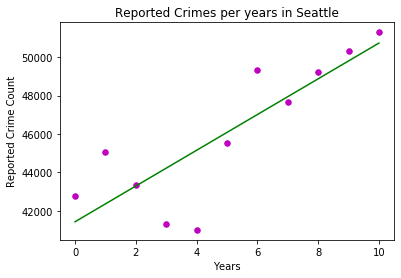

In [140]:
# observations 
x = np.array(topYears).astype(np.float) # Years
y = np.array(topYearsCrime).astype(np.float) # Amount

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
print(f"Equation for expected amount of crime this year is: Crime = Years * {round(b[1])} + {round(b[0])}")
print(f'The expected amount of crimes in the Seattle area is {round(b[1] * 11 + b[0], 0)} in 2019 and {round(b[1] * 12 + b[0], 0)} in 2020')

# plotting regression line 
plot_regression_line(x, y, b, 'Years', 'Reported Crime Count', 'Reported Crimes per years in Seattle')

In [ ]:
# 1. What types of crime happened during different times of the day - finshed
# 2. Difference in time between occurred date vs reported date. - finished
    # What subcategories of crimes had the highest differences in occurred vs reported date 
# 3. Over the years has reported crime went down - finished
# 4. Crime statistics for the city neighbourhoods 
